In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

# Manually create a list of sample hdf5 files for the last WSe2 single sample batch run at 600C.
single_sample_batch_directory = r'//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/'

sample_h5s = [os.path.join(single_sample_batch_directory,i) for i in os.listdir(single_sample_batch_directory)]
sample_h5s

['//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_1_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_2_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_3 Add Se_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_4 Add Se_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_5 Add Se_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_5_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_6 add Se_sample_1_)_V2.h5',
 '//SonOfThePile/PLD Control Data/

# Create Feature Set

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_1_sample_1_)_V2.h5


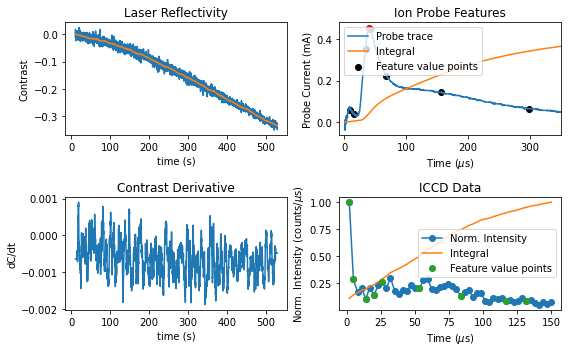

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_2_sample_1_)_V2.h5


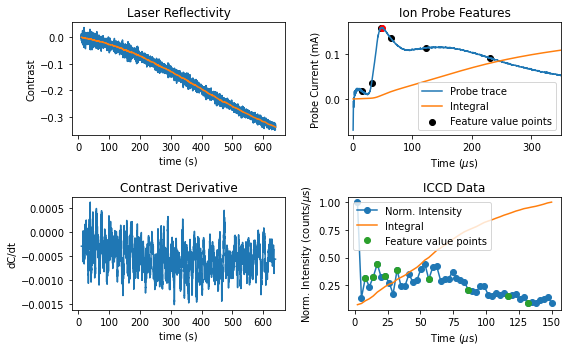

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_3 Add Se_sample_1_)_V2.h5


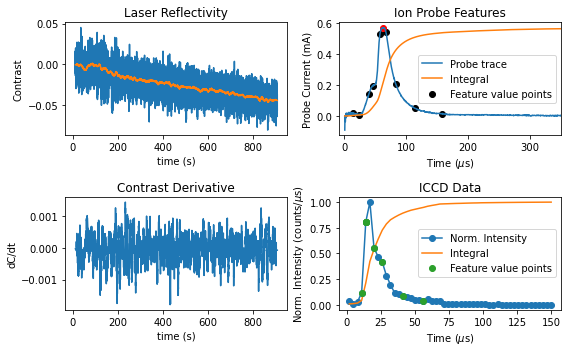

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_4 Add Se_sample_1_)_V2.h5


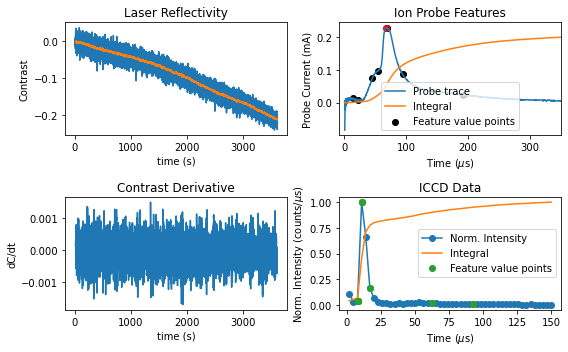

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_5 Add Se_sample_1_)_V2.h5


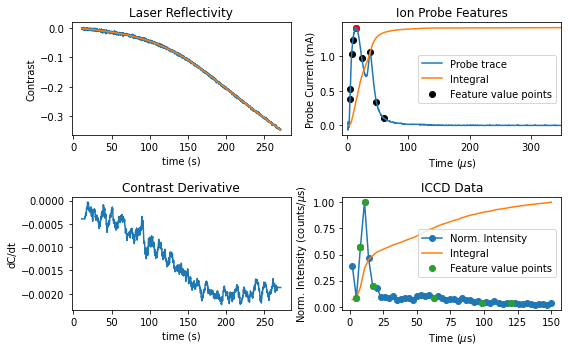

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_5_sample_1_)_V2.h5


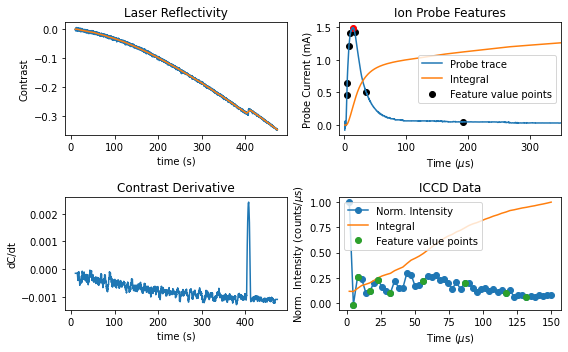

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_6 add Se_sample_1_)_V2.h5


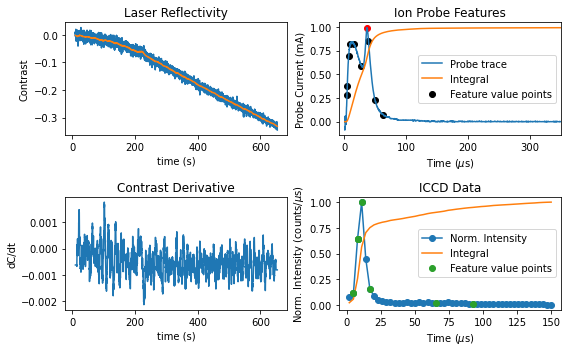

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_6_sample_1_)_V2.h5


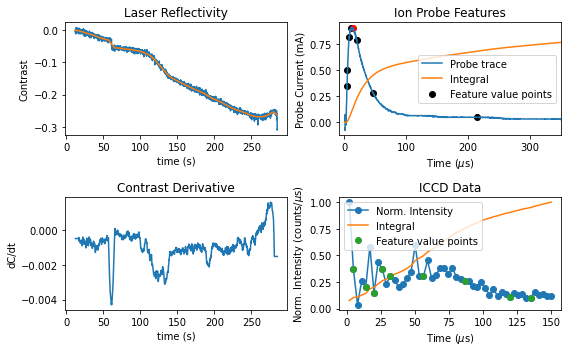

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_6_try2_sample_1_)_V2.h5


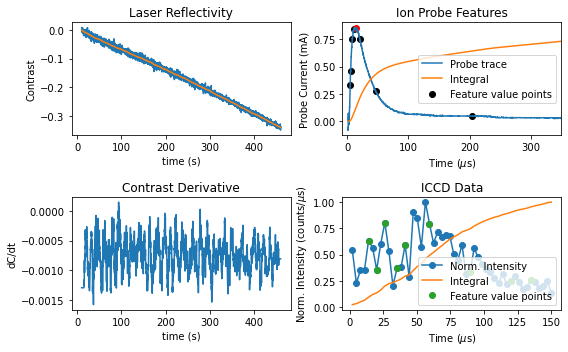

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_7 add Se_sample_1_)_V2.h5


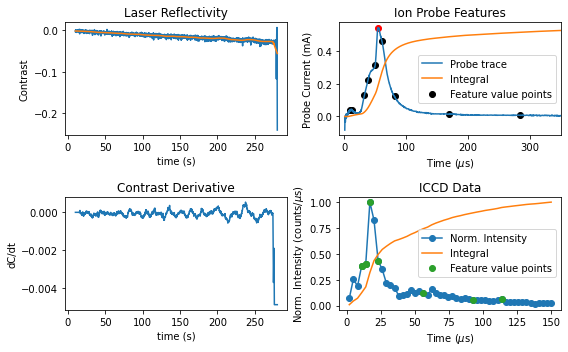

//SonOfThePile/PLD Control Data/Batch Sample Data/050922 WSe2 Batch 3/All h5 from this run/050922 WSe2 Batch 3_7 add Se_try2_sample_1_)_V2.h5


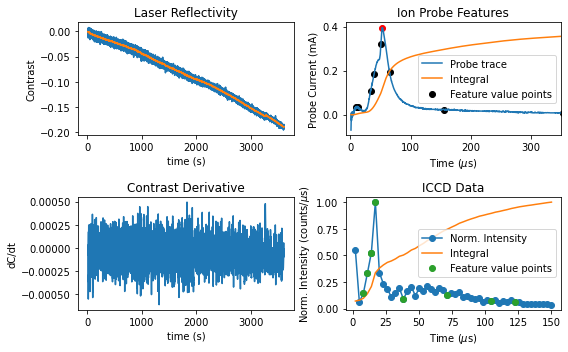

In [2]:
import PLD_Features_Generator as PLD

features = []

for i in sample_h5s:
    print(i)
    features.append(PLD.PLD_Sample_Features(i, visualize=True))

# Create Raman FWHM target array
The target for this experiment is the FWHM of the main WSe2 Raman mode. A Si substrate reference file is used to substrate the Si contribution to the Raman spectrum and an attempt to fit the WSe2 spectrum is made.

index is 0
This is probably a bad fit, check and retry


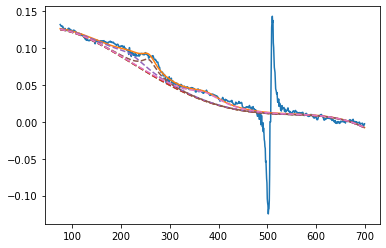

index is 1
This is probably a bad fit, check and retry


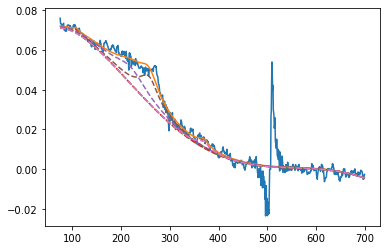

index is 2
This is probably a bad fit, check and retry


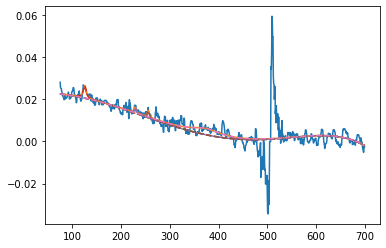

index is 3
This is probably a bad fit, check and retry


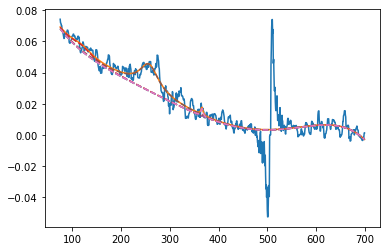

index is 4


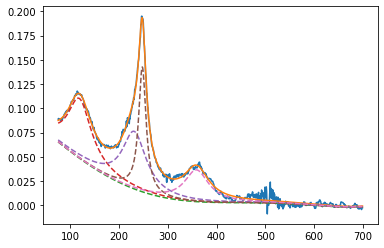

index is 5
This is probably a bad fit, check and retry


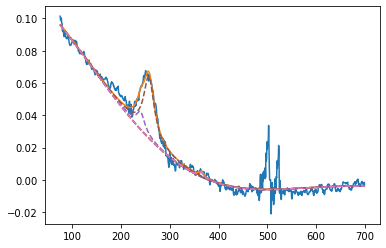

index is 6
This is probably a bad fit, check and retry


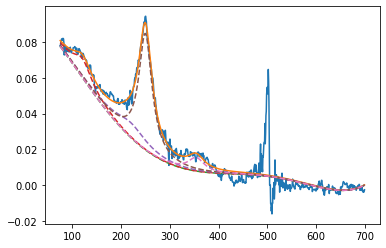

index is 7
This is probably a bad fit, check and retry


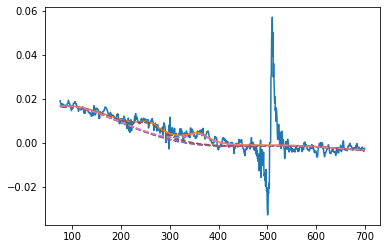

index is 8
This is probably a bad fit, check and retry


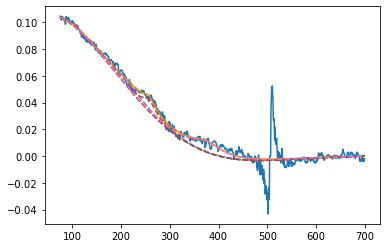

index is 9
This is probably a bad fit, check and retry


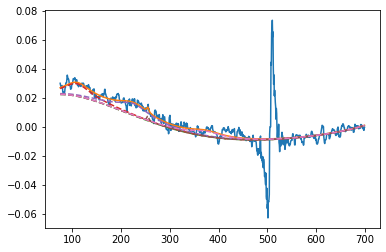

index is 10
This is probably a bad fit, check and retry


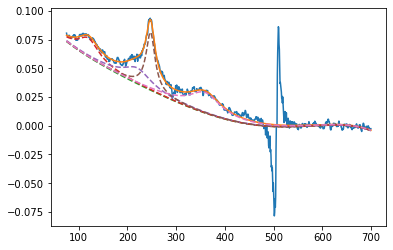

In [3]:
import WSe2_Target_Extractor as target

Si600C_Raman_reference = '050522 600C Si reference 200 mW 10sx6.csv'

Raman_fit_parameters = []

for v,i in enumerate(sample_h5s):
    print('index is',v)
    Raman_fit_parameters.append(target.get_WSe2_A1_FWHM_Si_ref_Raman(i, Si600C_Raman_reference,visualize=True))

# Update feature set with FWHM target

In [4]:
for i,result in enumerate(Raman_fit_parameters):
    print(result.params['peak_2_fwhm'].value)
    features[i]['FWHM Target'] = result.params['peak_2_fwhm'].value

37.6843936140763
49.679115941777695
5.000000000000004
47.92099019915106
18.3230757213894
26.60030309007234
32.8398749240142
63.37613337518823
32.862372706322404
5.000000000000004
22.476754457870282


# **NOTE: There are a couple bad fits that give a false FWHM
In the list above, there are two FWHM reported as 5.000000000000004 which means that the fitting procedure dropped the peak width to the minimum allowed value trying to fit. Inspecting the spectra in the cell above shows that these fits are bad.

Need to improve fitting procedure and incorporate a filter for "bad" samples.

Also a few samples never made it to the correct thickness and the deposition was automatically stopped after 15 minutes. The target was -0.33 contrast. Sample index 2, 3, 7, 9, and 10 didn't make it that far. However sample 10 shows a promising Raman spectrum.

In [5]:
for i in features:
    print(i['Final LR Contrast'])

-0.3341809996524487
-0.3376114944427441
-0.04398454065670628
-0.21143781895325228
-0.34656116456711406
-0.34841520272551385
-0.33159469535134856
-0.262384174289657
-0.33879031149605077
-0.05569744987344141
-0.18967186797399244


# Save feature set as json

In [6]:
with open('WSe2 Test Feature Set.json','w') as file:
    json.dump(features, file)

# Read feature set from json

In [7]:
import pandas as pd
pd.set_option('display.max_columns',None)

feature_df = pd.read_json('WSe2 Test Feature Set.json')
feature_df

,Pressure (Torr),Gas 1,Gas 1 Flowrate (sccm),Gas 2,Gas 2 Flowrate (sccm),Rep Rate 1,Aperture 1 Size X (mm),Aperture 1 Size Y (mm),Aperture 1 Area (mm^2),Laser 1 Energy (mJ),Rep Rate 2,Aperture 2 Size X (mm),Aperture 2 Size Y (mm),Aperture 2 Area (mm^2),Laser 2 Energy (mJ),Number of pulses 2,Substrate Temperature (C),Target-Substrate Distance 1 (cm),Target-Substrate Distance 2 (cm),Number of pulses,Final LR Contrast,Average LR Derivative,Stdev LR Derivative,Abs Max LR Derivative,0.5% TOF velocity (cm/us),0.5% probe current (mA),1% TOF velocity (cm/us),1% probe current (mA),5% TOF velocity (cm/us),5% probe current (mA),10% TOF velocity (cm/us),10% probe current (mA),25% TOF velocity (cm/us),25% probe current (mA),50% TOF velocity (cm/us),50% probe current (mA),75% TOF velocity (cm/us),75% probe current (mA),90% TOF velocity (cm/us),90% probe current (mA),95% TOF velocity (cm/us),95% probe current (mA),Integrated probe current (C),Ion probe Peak TOF velocity (cm/us),Ion probe Peak current (mA),10% cumsum ICCD Intensity TOF velocity (cm/us),10% cumsum ICCD Intensity (f^2 counts/us),15% cumsum ICCD Intensity TOF velocity (cm/us),15% cumsum ICCD Intensity (f^2 counts/us),20% cumsum ICCD Intensity TOF velocity (cm/us),20% cumsum ICCD Intensity (f^2 counts/us),25% cumsum ICCD Intensity TOF velocity (cm/us),25% cumsum ICCD Intensity (f^2 counts/us),30% cumsum ICCD Intensity TOF velocity (cm/us),30% cumsum ICCD Intensity (f^2 counts/us),50% cumsum ICCD Intensity TOF velocity (cm/us),50% cumsum ICCD Intensity (f^2 counts/us),75% cumsum ICCD Intensity TOF velocity (cm/us),75% cumsum ICCD Intensity (f^2 counts/us),90% cumsum ICCD Intensity TOF velocity (cm/us),90% cumsum ICCD Intensity (f^2 counts/us),95% cumsum ICCD Intensity TOF velocity (cm/us),95% cumsum ICCD Intensity (f^2 counts/us),Peak ICCD intensity value (f^2 counts/us),Peak ICCD intensity TOF velocity (cm/us),Integrated ICCD Intensity (f^2 counts),FWHM Target
0,150,Ar,5,None,NaN,2,8,8,64,28.8,NaN,NaN,NaN,NaN,NaN,NaN,600,5,NaN,1039,-0.334181,-0.000641,0.000448,0.001889,0.494641,0.059879,0.313185,0.039406,0.139425,0.353265,0.116473,0.450964,0.070909,0.223806,0.030900,0.144061,0.016129,0.064314,0.009263,0.024057,0.006822,0.008291,5.751064e-08,0.118259,0.455759,2.400000,662.716356,0.956097,190.925203,0.340870,71.788579,0.238540,95.779469,0.183463,172.989295,0.089977,134.834030,0.057450,89.895319,0.041105,59.024633,0.036397,56.007405,662.716356,2.400000,16858.074866,37.684394
1,200,Ar,5,None,NaN,2,8,8,64,28.8,NaN,NaN,NaN,NaN,NaN,NaN,600,5,NaN,1260,-0.337611,-0.000536,0.000315,0.001511,0.290810,0.017727,0.150792,0.035319,0.098856,0.160414,0.075083,0.137073,0.038727,0.114717,0.020877,0.092589,0.011493,0.039046,0.006343,0.008794,0.004254,0.004126,4.617724e-08,0.098642,0.160508,0.596954,141.183362,0.340870,145.271497,0.280668,195.890343,0.207407,147.548144,0.149049,172.148350,0.085156,134.874764,0.055446,91.790098,0.041105,66.768353,0.036397,40.386093,442.037117,2.400000,16663.547942,49.679116
2,200,Ar,5,None,NaN,2,8,8,64,28.8,2.0,20.0,15.0,300.0,56.9,NaN,600,5,10.0,1797,-0.043985,-0.000049,0.000420,0.001798,0.347866,0.016326,0.202579,0.008862,0.120448,0.142536,0.103964,0.196546,0.083294,0.530550,0.071176,0.541965,0.057787,0.208100,0.041976,0.048466,0.030534,0.014442,2.209304e-08,0.077204,0.573673,0.433949,4150.841292,0.340870,28074.484681,0.340870,28074.484681,0.340870,28074.484681,0.340870,28074.484681,0.238540,19312.393858,0.183463,14519.311421,0.116320,3066.246709,0.085156,1435.152449,34828.886728,0.280668,496250.142825,5.000000
3,200,Ar,5,None,NaN,2,8,8,64,28.8,2.0,20.0,15.0,300.0,56.9,NaN,600,5,10.0,7198,-0.211438,-0.000058,0.000401,0.001722,0.340677,0.013431,0.213204,0.007798,0.105582,0.074393,0.088339,0.097139,0.069448,0.226971,0.050929,0.085830,0.024985,0.023490,0.010275,0.003546,0.005710,0.002292,1.570334e-08,0.071994,0.228753,0.596954,303.153913,0.596954,303.153913,0.596954,303.153913,0.596954,303.153913,0.433949,8658.925198,0.433949,8658.925198,0.280668,1413.128838,0.076913,1

In [8]:
feature_df['Final LR Contrast']

0    -0.334181
1    -0.337611
2    -0.043985
3    -0.211438
4    -0.346561
5    -0.348415
6    -0.331595
7    -0.262384
8    -0.338790
9    -0.055697
10   -0.189672
Name: Final LR Contrast, dtype: float64

# Basic Correlations

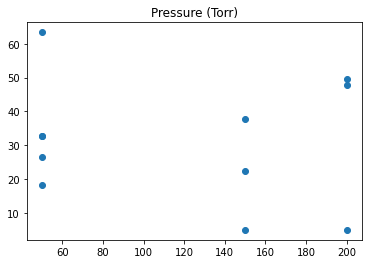

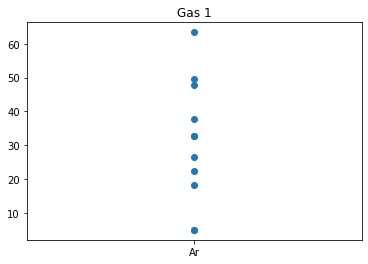

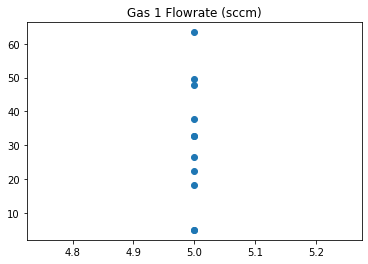

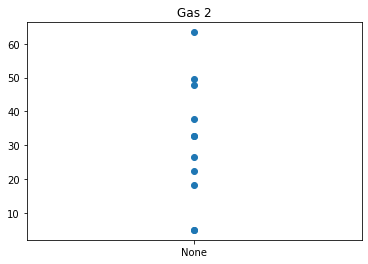

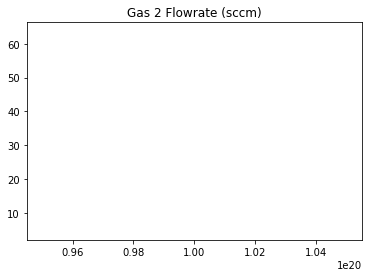

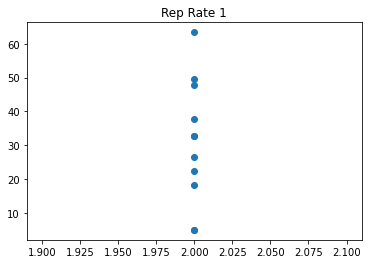

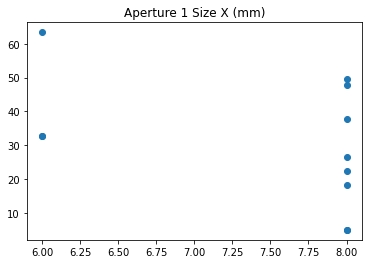

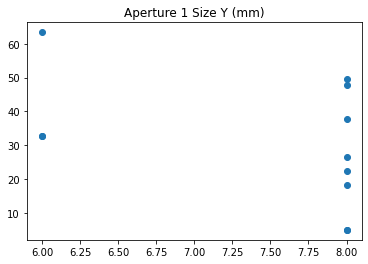

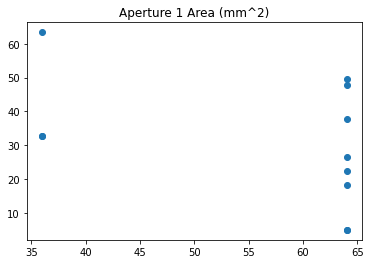

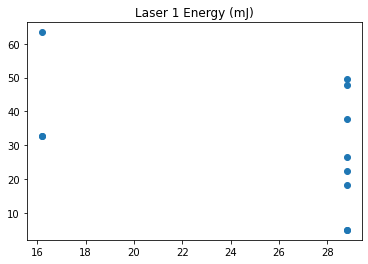

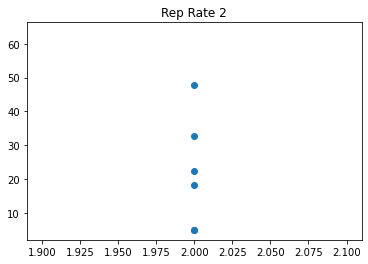

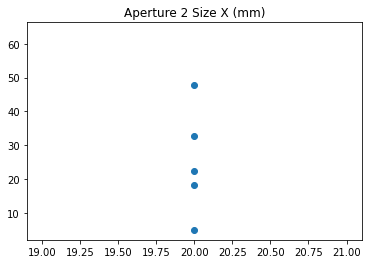

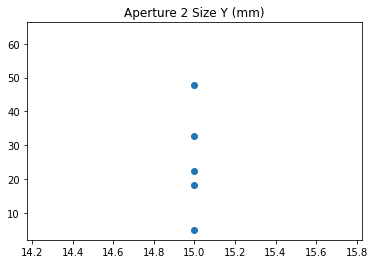

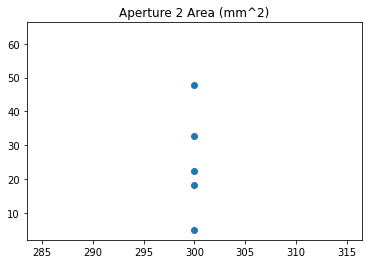

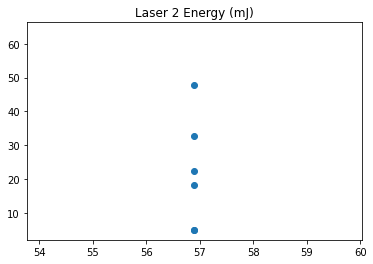

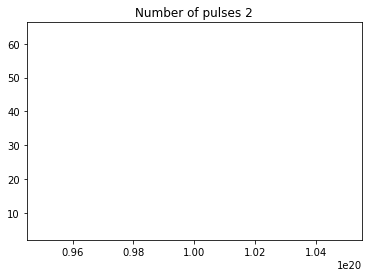

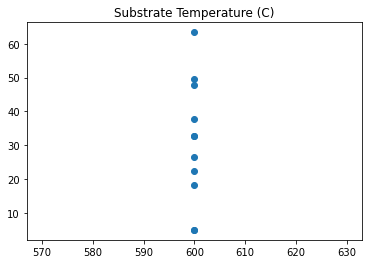

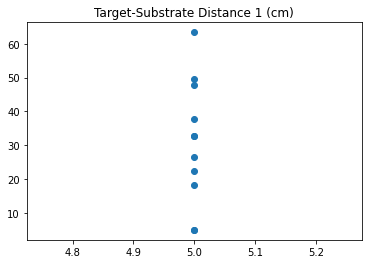

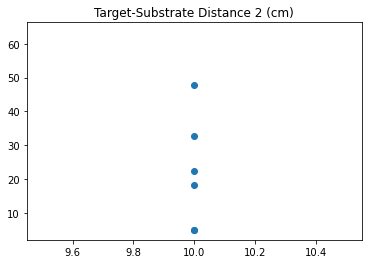

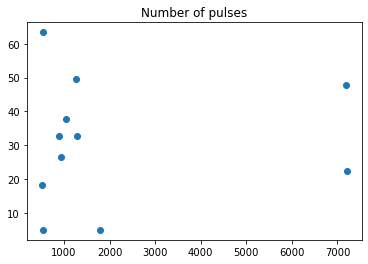

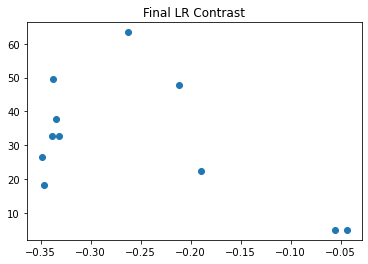

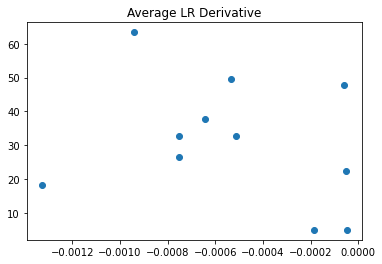

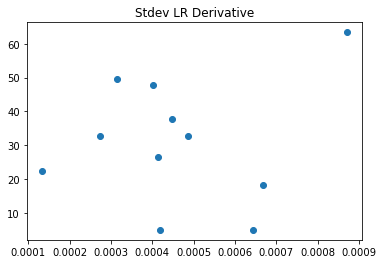

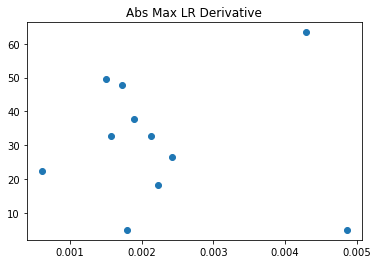

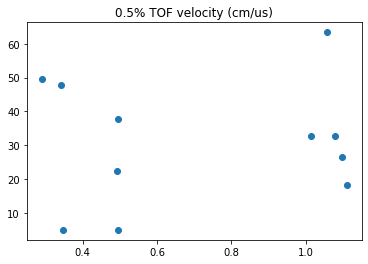

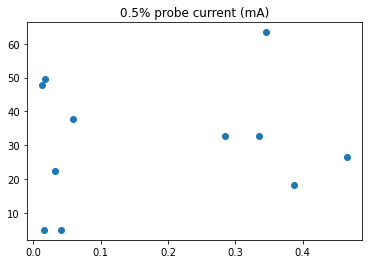

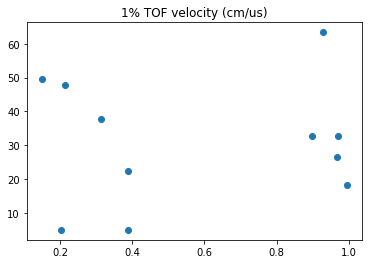

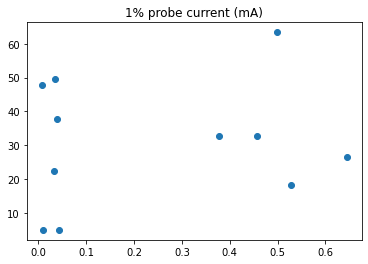

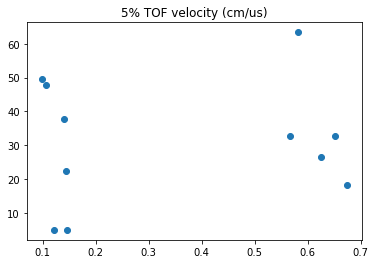

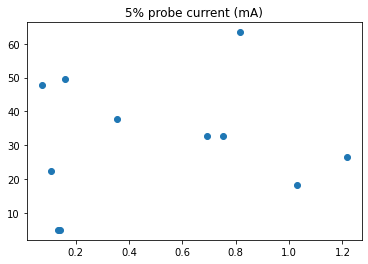

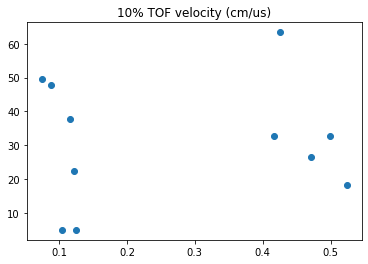

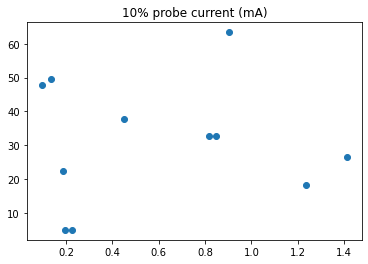

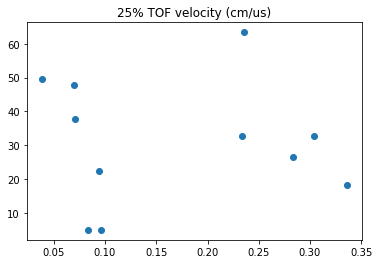

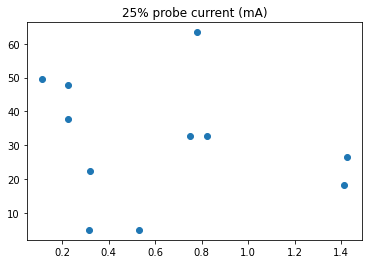

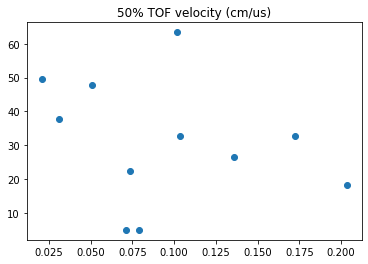

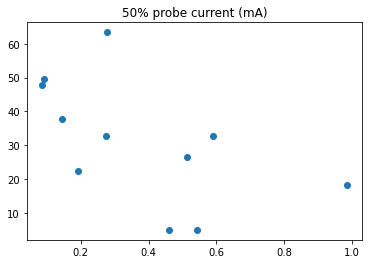

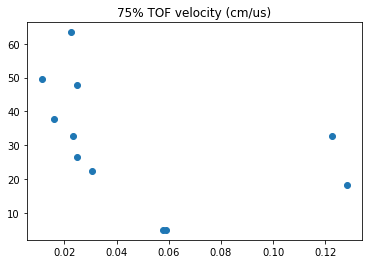

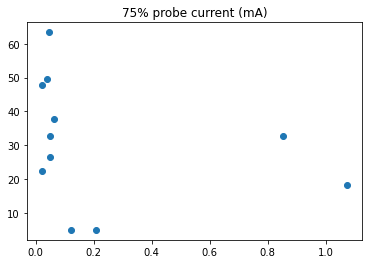

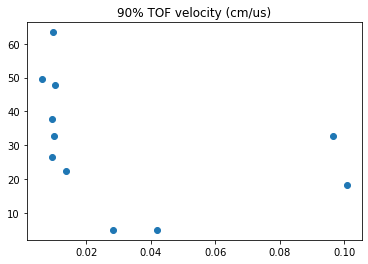

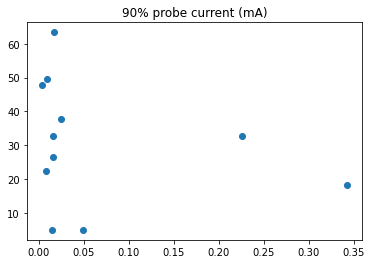

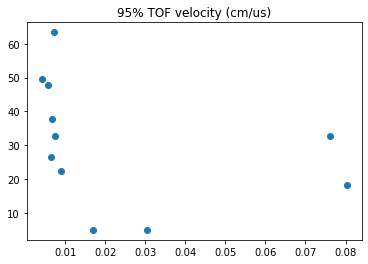

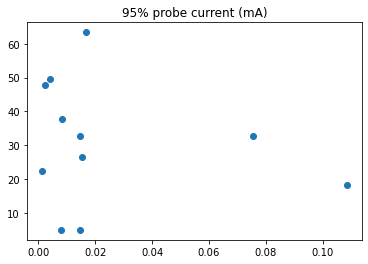

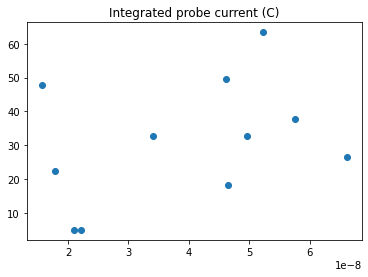

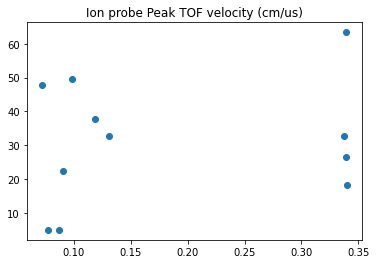

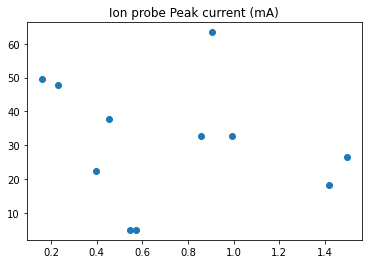

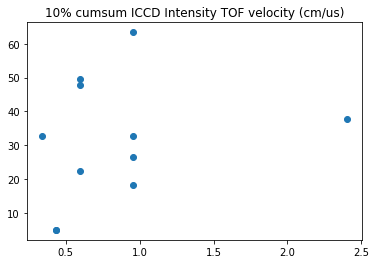

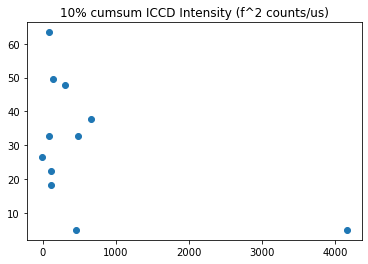

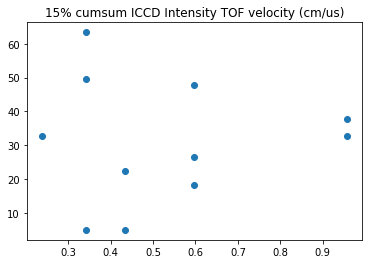

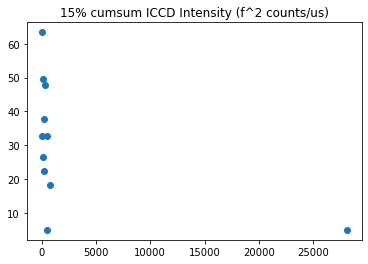

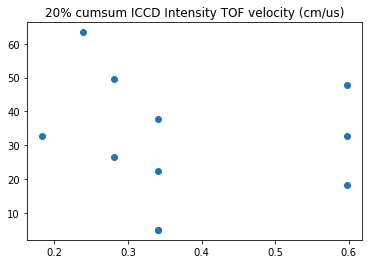

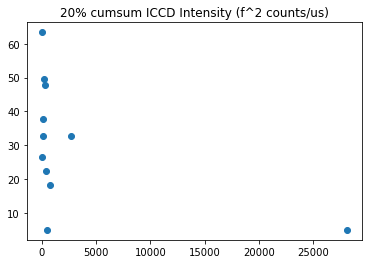

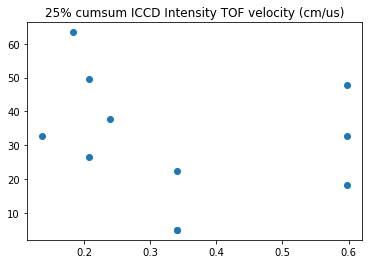

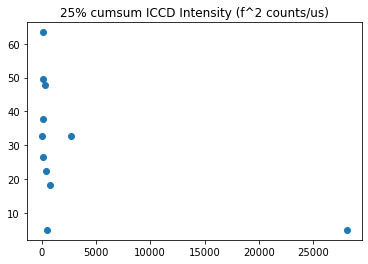

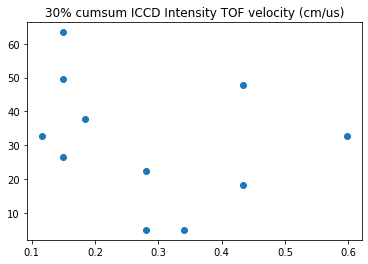

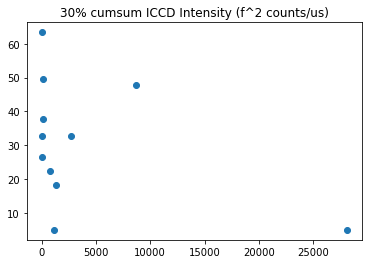

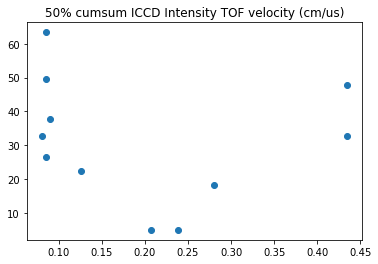

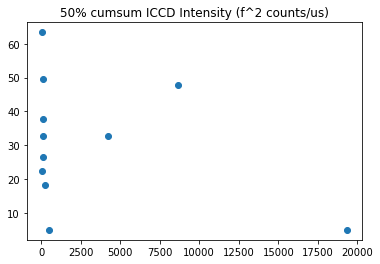

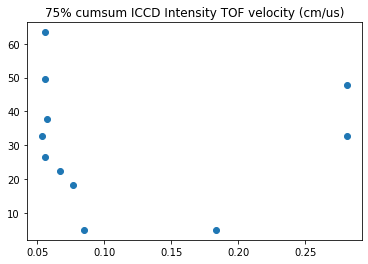

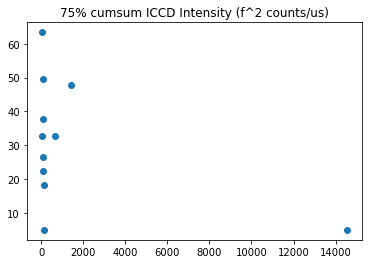

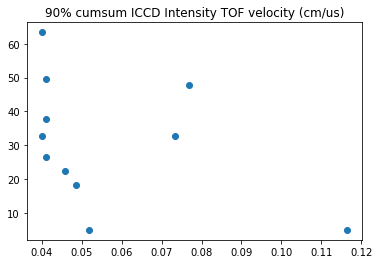

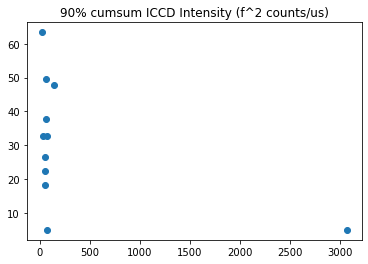

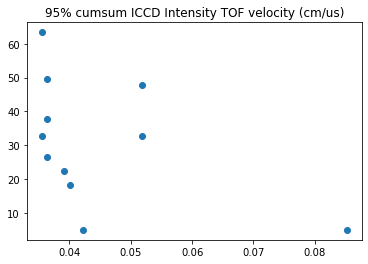

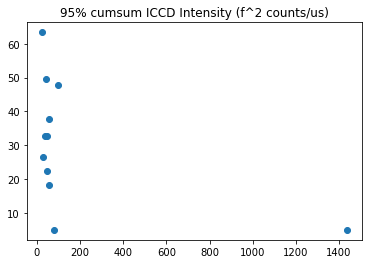

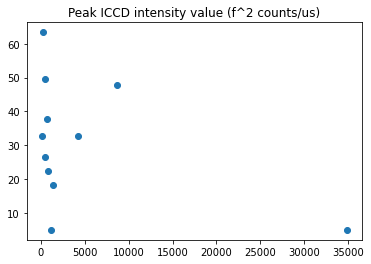

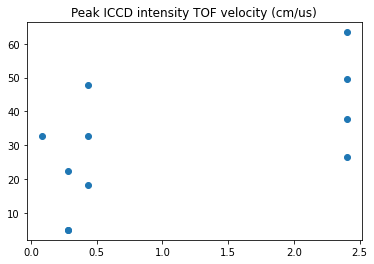

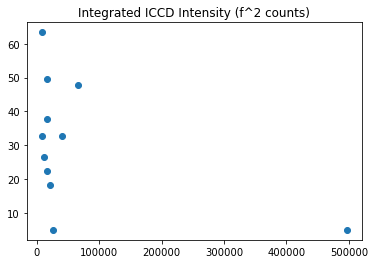

In [9]:
X = feature_df.values[:,:-1]
Y = feature_df.values[:,-1]

for i in range(X.shape[1]):
    plt.scatter(X[:,i],Y)
    plt.title(feature_df.keys()[i])
    plt.show()